# Applying Classification Modeling
The goal of this week's assessment is to find the model which best predicts whether or not a person will default on their bank loan. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 


#### Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default. 

- NT is the abbreviation for New Taiwain. 


#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 




You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) to predict credit card defaults and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

- You will be working in pairs for this assessment

### Please have ONE notebook and be prepared to explain how you worked in your pair.

1. Clean up your data set so that you can perform an EDA. 
    - This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Engineer new features. 
    - Create polynomial and/or interaction features. 
    - Additionaly, you must also create **at least 2 new features** that are not interactions or polynomial transformations. 
        - *For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.*
4. Perform some feature selection. 
    
5. You must fit **three** models to your data and tune **at least 1 hyperparameter** per model. 
6. Using the F-1 Score, evaluate how well your models perform and identify your best model.
7. Using information from your EDA process and your model(s) output provide insight as to which borrowers are more likely to deafult


In [1]:
# import libraries

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 1000)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
import warnings; warnings.simplefilter('ignore')
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import chisquare
#SK LEARN
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.formula.api import ols

## 1. Data Cleaning

In [2]:
df = pd.read_csv('training_data.csv', index_col=0)

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
28835,220000,2,1,2,36,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
25329,200000,2,3,2,29,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0
18894,180000,2,1,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
690,80000,1,2,2,32,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
6239,10000,1,2,2,27,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1


In [4]:
df.index.sort_values()

Index(['1', '10', '100', '1000', '10001', '10003', '10004', '10005', '10007',
       '10009',
       ...
       '9982', '9985', '9986', '9988', '9990', '9992', '9995', '9997', '9999',
       'ID'],
      dtype='object', length=22500)

In [5]:
df.columns = df.loc['ID']

In [6]:
df

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
28835,220000,2,1,2,36,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
25329,200000,2,3,2,29,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0
18894,180000,2,1,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
690,80000,1,2,2,32,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
6239,10000,1,2,2,27,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16247,40000,2,2,1,38,0,0,3,2,2,2,35183,39197,39477,39924,39004,41462,4600,1200,1400,0,3069,0,1
2693,350000,1,1,1,42,-1,-1,-1,-1,-1,-1,3800,3138,4150,3750,1362,8210,3138,4160,3750,2272,8210,9731,0
8076,100000,2,3,2,46,1,-1,2,2,-1,0,0,203,203,0,7856,16544,203,0,0,7856,10000,865,0
20213,20000,2,3,1,50,-1,-1,-1,-1,-2,-2,5141,3455,6906,0,0,0,3754,6906,290,0,0,0,1


In [7]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name='ID')

In [8]:
df[df.SEX=='SEX']

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [9]:
df= df[df['SEX'] != 'SEX'] 

In [10]:
for column in df.columns:
    print (df[column].value_counts())

50000      2534
20000      1488
30000      1223
80000      1210
200000     1134
           ... 
327680        1
1000000       1
690000        1
800000        1
740000        1
Name: LIMIT_BAL, Length: 80, dtype: int64
2    13572
1     8927
Name: SEX, dtype: int64
2    10516
1     7919
3     3713
5      208
4       90
6       42
0       11
Name: EDUCATION, dtype: int64
2    12026
1    10195
3      234
0       44
Name: MARRIAGE, dtype: int64
29    1243
27    1100
28    1064
30    1026
26     959
25     904
31     902
32     878
33     874
34     859
24     851
35     841
36     812
37     799
38     720
39     703
23     690
40     656
41     613
42     597
44     512
43     495
45     462
46     421
22     420
47     340
48     339
49     326
50     298
51     269
53     241
52     236
54     184
55     154
56     147
58      89
57      89
59      62
60      56
21      56
61      45
62      32
63      24
64      24
66      21
65      17
67      13
69      10
70      10
68       5
73    

In [11]:
df['EDUCATION']= df['EDUCATION'].map(lambda x: int(x))
df['MARRIAGE']= df['MARRIAGE'].map(lambda x: int(x))

In [12]:
df['EDUCATION']= np.where(df['EDUCATION'] > 4, 4, df['EDUCATION'])
df['EDUCATION']= np.where(df['EDUCATION'] < 1, 4, df['EDUCATION'])

In [13]:
df['MARRIAGE']= np.where(df['MARRIAGE'] > 3, 3, df['MARRIAGE'])
df['MARRIAGE']= np.where(df['MARRIAGE'] < 1, 3, df['MARRIAGE'])

In [14]:
df.isnull().sum()

ID
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [15]:
df = df.astype(float)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22499 entries, 28835 to 7624
Data columns (total 24 columns):
LIMIT_BAL                     22499 non-null float64
SEX                           22499 non-null float64
EDUCATION                     22499 non-null float64
MARRIAGE                      22499 non-null float64
AGE                           22499 non-null float64
PAY_0                         22499 non-null float64
PAY_2                         22499 non-null float64
PAY_3                         22499 non-null float64
PAY_4                         22499 non-null float64
PAY_5                         22499 non-null float64
PAY_6                         22499 non-null float64
BILL_AMT1                     22499 non-null float64
BILL_AMT2                     22499 non-null float64
BILL_AMT3                     22499 non-null float64
BILL_AMT4                     22499 non-null float64
BILL_AMT5                     22499 non-null float64
BILL_AMT6                     22499 non-null 

## 2. EDA

Hypothesis Testing:
    

1. is there a stat significant difference between education and default?
2. is there a stat significant difference between marriage and default?
3. is there a stat significant difference between age and default? 

for education - one way anova and then a post-hoc test?
for marriage - one way anova and then a post-hoc test?
for age - group by decade and then one way anova and then a post-hoc test?
don't forget to check for class imbalance 


## Education Hypothesis Test

In [17]:
## Education

#H0: there is NO difference between the education means and default
#Ha: there MAY BE a difference


print(stats.f_oneway(df['default payment next month'][df['EDUCATION']==1],df['default payment next month'][df['EDUCATION']==2],df['default payment next month'][df['EDUCATION']==3],df['default payment next month'][df['EDUCATION']==4]))

F_onewayResult(statistic=39.366395827086585, pvalue=2.3053832479502056e-25)


In [18]:
## Education post-hoc test

mc = MultiComparison(df['default payment next month'], df['EDUCATION'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   1.0    2.0   0.0461 0.001  0.0302   0.062   True
   1.0    3.0   0.0623 0.001   0.041  0.0835   True
   1.0    4.0  -0.1079 0.001 -0.1661 -0.0496   True
   2.0    3.0   0.0161 0.175 -0.0042  0.0365  False
   2.0    4.0   -0.154 0.001 -0.2119  -0.096   True
   3.0    4.0  -0.1701 0.001 -0.2297 -0.1105   True
---------------------------------------------------


#### we legit REJECT the null hypothesis because everything but college and grad school has a statistically significant difference

In [19]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = [[df['default payment next month']],[df['EDUCATION']]]
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

[[28835    1.0
25329    0.0
18894    0.0
690      0.0
6239     1.0
        ... 
16247    1.0
2693     0.0
8076     0.0
20213    1.0
7624     0.0
Name: default payment next month, Length: 22499, dtype: float64], [28835    1.0
25329    3.0
18894    1.0
690      2.0
6239     2.0
        ... 
16247    2.0
2693     1.0
8076     3.0
20213    3.0
7624     1.0
Name: EDUCATION, Length: 22499, dtype: float64]]
dof=22498
[[[0.2161558  0.3242337  0.1080779  ... 0.3242337  0.43231159 0.1080779 ]]

 [[1.7838442  2.6757663  0.8919221  ... 2.6757663  3.56768841 0.8919221 ]]]
probability=0.950, critical=22848.044, stat=13534.309
Independent (fail to reject H0)
significance=0.050, p=1.000
Independent (fail to reject H0)


## Marriage Hypothesis Test

In [20]:
## Marriage

#H0: there is NO difference between the marriage means and default
#Ha: there MAY BE a difference


print(stats.f_oneway(df['default payment next month'][df['MARRIAGE']==1],
                     df['default payment next month'][df['MARRIAGE']==2],
                     df['default payment next month'][df['MARRIAGE']==3]))




F_onewayResult(statistic=11.617719581364787, pvalue=9.05925280082901e-06)


In [21]:
## Marriage post-hoc test

mc = MultiComparison(df['default payment next month'], df['MARRIAGE'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1.0    2.0  -0.0257  0.001 -0.0389 -0.0126   True
   1.0    3.0  -0.0508 0.1105 -0.1101  0.0085  False
   2.0    3.0  -0.0251 0.5757 -0.0843  0.0341  False
----------------------------------------------------


#### we legit REJECT the null hypothesis because there is a statistically significant difference between single and married

In [22]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = [[df['default payment next month']],[df['MARRIAGE']]]
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

[[28835    1.0
25329    0.0
18894    0.0
690      0.0
6239     1.0
        ... 
16247    1.0
2693     0.0
8076     0.0
20213    1.0
7624     0.0
Name: default payment next month, Length: 22499, dtype: float64], [28835    2.0
25329    2.0
18894    2.0
690      2.0
6239     2.0
        ... 
16247    1.0
2693     1.0
8076     2.0
20213    1.0
7624     2.0
Name: MARRIAGE, Length: 22499, dtype: float64]]
dof=22498
[[[0.3760752 0.2507168 0.2507168 ... 0.2507168 0.2507168 0.2507168]]

 [[2.6239248 1.7492832 1.7492832 ... 1.7492832 1.7492832 1.7492832]]]
probability=0.950, critical=22848.044, stat=13183.901
Independent (fail to reject H0)
significance=0.050, p=1.000
Independent (fail to reject H0)


## Generation Hypothesis Test

Silent Generation - 1928-1945 (60 to 77)
Baby Boomers - 1946-1964 (41 to 59)
Gen X - 1965-1980 (25 to 40)
Millennials - 1981-1996 (24 and under)

In [23]:
df.AGE.describe()

count    22499.000000
mean        35.447931
std          9.237634
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         75.000000
Name: AGE, dtype: float64

In [24]:
df['current_year'] = 2005

In [25]:
df['YEAR_BIRTH'] = df['current_year'] - df['AGE']

In [26]:
df.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,current_year,YEAR_BIRTH
28835,220000.0,2.0,1.0,2.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,222598.0,222168.0,217900.0,221193.0,181859.0,184605.0,10000.0,8018.0,10121.0,6006.0,10987.0,143779.0,1.0,2005,1969.0
25329,200000.0,2.0,3.0,2.0,29.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,0.0,2005,1976.0
18894,180000.0,2.0,1.0,2.0,27.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005,1978.0
690,80000.0,1.0,2.0,2.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,51372.0,51872.0,47593.0,43882.0,42256.0,42527.0,1853.0,1700.0,1522.0,1548.0,1488.0,1500.0,0.0,2005,1973.0
6239,10000.0,1.0,2.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,8257.0,7995.0,4878.0,5444.0,2639.0,2697.0,2000.0,1100.0,600.0,300.0,300.0,1000.0,1.0,2005,1978.0


In [27]:
#silent = 1
#boomer = 2
#x = 3
#millennial = 4

bins = [1925, 1946, 1965, 1981, 1997]

bins_year_birth = pd.cut(df['YEAR_BIRTH'], bins, include_lowest = True, labels = (1, 2, 3, 4))
df['GENERATION'] = bins_year_birth.cat.as_unordered()

In [28]:
df.head(100)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,current_year,YEAR_BIRTH,GENERATION
28835,220000.0,2.0,1.0,2.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,222598.0,222168.0,217900.0,221193.0,181859.0,184605.0,10000.0,8018.0,10121.0,6006.0,10987.0,143779.0,1.0,2005,1969.0,3
25329,200000.0,2.0,3.0,2.0,29.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,0.0,2005,1976.0,3
18894,180000.0,2.0,1.0,2.0,27.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005,1978.0,3
690,80000.0,1.0,2.0,2.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,51372.0,51872.0,47593.0,43882.0,42256.0,42527.0,1853.0,1700.0,1522.0,1548.0,1488.0,1500.0,0.0,2005,1973.0,3
6239,10000.0,1.0,2.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,8257.0,7995.0,4878.0,5444.0,2639.0,2697.0,2000.0,1100.0,600.0,300.0,300.0,1000.0,1.0,2005,1978.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25127,740000.0,1.0,1.0,1.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,321279.0,316083.0,317219.0,296560.0,285912.0,268257.0,13000.0,13200.0,11000.0,10000.0,10000.0,15000.0,0.0,2005,1955.0,2
8283,640000.0,2.0,1.0,2.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,116714.0,77893.0,60259.0,40539.0,26432.0,5018.0,4000.0,4000.0,2003.0,7202.0,5314.0,3535.0,0.0,2005,1975.0,3
14077,120000.0,2.0,2.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,110686.0,103869.0,90809.0,67313.0,16040.0,116654.0,7000.0,5000.0,5000.0,4000.0,110000.0,4593.0,0.0,2005,1978.0,3
22350,490000.0,2.0,2.0,2.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,128821.0,93626.0,52074.0,118595.0,93461.0,86682.0,3047.0,2647.0,88595.0,3203.0,3142.0,3166.0,0.0,2005,1977.0,3


In [29]:
df['default payment next month'].describe()

count    22499.000000
mean         0.223477
std          0.416584
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default payment next month, dtype: float64

In [30]:
## Generation

#H0: there is NO difference between the Generation means and default
#Ha: there MAY BE a difference


print(stats.f_oneway(df['default payment next month'][df['GENERATION']==1],
                     df['default payment next month'][df['GENERATION']==2],
                     df['default payment next month'][df['GENERATION']==3],
                     df['default payment next month'][df['GENERATION']==4]))




F_onewayResult(statistic=19.317477627707433, pvalue=1.6680585928770798e-12)


In [31]:
## Generation post-hoc test

mc = MultiComparison(df['default payment next month'], df['GENERATION'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.0402 0.3168 -0.1006  0.0201  False
     1      3  -0.0685 0.0163  -0.128  -0.009   True
     1      4   0.0102    0.9 -0.0564  0.0769  False
     2      3  -0.0283  0.001 -0.0443 -0.0123   True
     2      4   0.0505  0.001  0.0165  0.0845   True
     3      4   0.0788  0.001  0.0462  0.1113   True
----------------------------------------------------


#### we legit REJECT the null hypothesis because everything but silent|boomer and silent|millennial have a statistically significant difference

In [32]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = [[df['default payment next month']],[df['GENERATION']]]
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

[[28835    1.0
25329    0.0
18894    0.0
690      0.0
6239     1.0
        ... 
16247    1.0
2693     0.0
8076     0.0
20213    1.0
7624     0.0
Name: default payment next month, Length: 22499, dtype: float64], [28835    3
25329    3
18894    3
690      3
6239     3
        ..
16247    3
2693     2
8076     2
20213    2
7624     3
Name: GENERATION, Length: 22499, dtype: category
Categories (4, int64): [1, 2, 3, 4]]]
dof=22498
[[[0.30214984 0.22661238 0.22661238 ... 0.15107492 0.22661238 0.22661238]]

 [[3.69785016 2.77338762 2.77338762 ... 1.84892508 2.77338762 2.77338762]]]
probability=0.950, critical=22848.044, stat=14491.028
Independent (fail to reject H0)
significance=0.050, p=1.000
Independent (fail to reject H0)


## 3. Feature Engineering

- one possible feature is age by payment status? first break age into groups (by decade)
- one possible feature is difference between pmt and bill 

### Creating Dummies

In [33]:
clean_df = pd.get_dummies(df, columns=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], drop_first=True)

In [34]:
clean_df.rename(columns={"default payment next month": "DEFAULT"},inplace=True)

In [35]:
clean_df

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,current_year,YEAR_BIRTH,GENERATION,SEX_2.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,MARRIAGE_2.0,MARRIAGE_3.0,PAY_0_-1.0,PAY_0_0.0,PAY_0_1.0,PAY_0_2.0,PAY_0_3.0,PAY_0_4.0,PAY_0_5.0,PAY_0_6.0,PAY_0_7.0,PAY_0_8.0,PAY_2_-1.0,PAY_2_0.0,PAY_2_1.0,PAY_2_2.0,PAY_2_3.0,PAY_2_4.0,PAY_2_5.0,PAY_2_6.0,PAY_2_7.0,PAY_2_8.0,PAY_3_-1.0,PAY_3_0.0,PAY_3_1.0,PAY_3_2.0,PAY_3_3.0,PAY_3_4.0,PAY_3_5.0,PAY_3_6.0,PAY_3_7.0,PAY_3_8.0,PAY_4_-1.0,PAY_4_0.0,PAY_4_1.0,PAY_4_2.0,PAY_4_3.0,PAY_4_4.0,PAY_4_5.0,PAY_4_6.0,PAY_4_7.0,PAY_4_8.0,PAY_5_-1.0,PAY_5_0.0,PAY_5_2.0,PAY_5_3.0,PAY_5_4.0,PAY_5_5.0,PAY_5_6.0,PAY_5_7.0,PAY_5_8.0,PAY_6_-1.0,PAY_6_0.0,PAY_6_2.0,PAY_6_3.0,PAY_6_4.0,PAY_6_5.0,PAY_6_6.0,PAY_6_7.0,PAY_6_8.0
28835,220000.0,36.0,222598.0,222168.0,217900.0,221193.0,181859.0,184605.0,10000.0,8018.0,10121.0,6006.0,10987.0,143779.0,1.0,2005,1969.0,3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
25329,200000.0,29.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,0.0,2005,1976.0,3,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
18894,180000.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005,1978.0,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
690,80000.0,32.0,51372.0,51872.0,47593.0,43882.0,42256.0,42527.0,1853.0,1700.0,1522.0,1548.0,1488.0,1500.0,0.0,2005,1973.0,3,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6239,10000.0,27.0,8257.0,7995.0,4878.0,5444.0,2639.0,2697.0,2000.0,1100.0,600.0,300.0,300.0,1000.0,1.0,2005,1978.0,3,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16247,40000.0,38.0,35183.0,39197.0,39477.0,39924.0,39004.0,41462.0,4600.0,1200.0,1400.0,0.0,3069.0,0.0,1.0,2005,1967.0,3,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2693,350000.0,42.0,3800.0,3138.0,4150.0,3750.0,1362.0,8210.0,3138.0,4160.0,3750.0,2272.0,8210.0,9731.0,0.0,2005,1963.0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8076,100000.0,46.0,0.0,203.0,203.0,0.0,7856.0,16544.0,203.0,0.0,0.0,7856.0,10000.0,865.0,0.0,2005,1959.0,2,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
20213,20000.0,50.0,5141.0,3455.0,6906.0,0.0,0.0,0.0,3754.0,6906.0,290.0,0.0,0.0,0.0,1.0,2005,1955.0,2,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Feature 1 - Pay Ratio

In [36]:
clean_df['AVG_BILL_STMT'] = (clean_df['BILL_AMT1']+clean_df['BILL_AMT2']+clean_df['BILL_AMT3']+clean_df['BILL_AMT4']+clean_df['BILL_AMT5']+clean_df['BILL_AMT6'])/6
clean_df['AVG_AMT_PAID'] = (clean_df['PAY_AMT1']+clean_df['PAY_AMT2']+clean_df['PAY_AMT3']+clean_df['PAY_AMT4']+clean_df['PAY_AMT5']+clean_df['PAY_AMT6'])/6




In [37]:
clean_df['PAY_RATIO']= clean_df['AVG_AMT_PAID']/clean_df['AVG_BILL_STMT']


In [38]:
clean_df.PAY_RATIO.fillna(1, inplace=True)


In [39]:
clean_df.PAY_RATIO.describe()

count    2.249900e+04
mean              inf
std               NaN
min     -5.410847e+02
25%      4.274411e-02
50%      1.022974e-01
75%      6.937748e-01
max               inf
Name: PAY_RATIO, dtype: float64

In [40]:
clean_df.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,current_year,YEAR_BIRTH,GENERATION,SEX_2.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,MARRIAGE_2.0,MARRIAGE_3.0,PAY_0_-1.0,PAY_0_0.0,PAY_0_1.0,PAY_0_2.0,PAY_0_3.0,PAY_0_4.0,PAY_0_5.0,PAY_0_6.0,PAY_0_7.0,PAY_0_8.0,PAY_2_-1.0,PAY_2_0.0,PAY_2_1.0,PAY_2_2.0,PAY_2_3.0,PAY_2_4.0,PAY_2_5.0,PAY_2_6.0,PAY_2_7.0,PAY_2_8.0,PAY_3_-1.0,PAY_3_0.0,PAY_3_1.0,PAY_3_2.0,PAY_3_3.0,PAY_3_4.0,PAY_3_5.0,PAY_3_6.0,PAY_3_7.0,PAY_3_8.0,PAY_4_-1.0,PAY_4_0.0,PAY_4_1.0,PAY_4_2.0,PAY_4_3.0,PAY_4_4.0,PAY_4_5.0,PAY_4_6.0,PAY_4_7.0,PAY_4_8.0,PAY_5_-1.0,PAY_5_0.0,PAY_5_2.0,PAY_5_3.0,PAY_5_4.0,PAY_5_5.0,PAY_5_6.0,PAY_5_7.0,PAY_5_8.0,PAY_6_-1.0,PAY_6_0.0,PAY_6_2.0,PAY_6_3.0,PAY_6_4.0,PAY_6_5.0,PAY_6_6.0,PAY_6_7.0,PAY_6_8.0,AVG_BILL_STMT,AVG_AMT_PAID,PAY_RATIO
28835,220000.0,36.0,222598.0,222168.0,217900.0,221193.0,181859.0,184605.0,10000.0,8018.0,10121.0,6006.0,10987.0,143779.0,1.0,2005,1969.0,3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,208387.166667,31485.166667,0.151090
25329,200000.0,29.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,0.0,2005,1976.0,3,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,326.000000,326.000000,1.000000
18894,180000.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005,1978.0,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,1.000000
690,80000.0,32.0,51372.0,51872.0,47593.0,43882.0,42256.0,42527.0,1853.0,1700.0,1522.0,1548.0,1488.0,1500.0,0.0,2005,1973.0,3,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,46583.666667,1601.833333,0.034386
6239,10000.0,27.0,8257.0,7995.0,4878.0,5444.0,2639.0,2697.0,2000.0,1100.0,600.0,300.0,300.0,1000.0,1.0,2005,1978.0,3,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5318.333333,883.333333,0.166092


In [41]:
clean_df.replace(np.inf, 1, inplace=True)

In [42]:
clean_df.sort_values(by='PAY_RATIO')

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,current_year,YEAR_BIRTH,GENERATION,SEX_2.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,MARRIAGE_2.0,MARRIAGE_3.0,PAY_0_-1.0,PAY_0_0.0,PAY_0_1.0,PAY_0_2.0,PAY_0_3.0,PAY_0_4.0,PAY_0_5.0,PAY_0_6.0,PAY_0_7.0,PAY_0_8.0,PAY_2_-1.0,PAY_2_0.0,PAY_2_1.0,PAY_2_2.0,PAY_2_3.0,PAY_2_4.0,PAY_2_5.0,PAY_2_6.0,PAY_2_7.0,PAY_2_8.0,PAY_3_-1.0,PAY_3_0.0,PAY_3_1.0,PAY_3_2.0,PAY_3_3.0,PAY_3_4.0,PAY_3_5.0,PAY_3_6.0,PAY_3_7.0,PAY_3_8.0,PAY_4_-1.0,PAY_4_0.0,PAY_4_1.0,PAY_4_2.0,PAY_4_3.0,PAY_4_4.0,PAY_4_5.0,PAY_4_6.0,PAY_4_7.0,PAY_4_8.0,PAY_5_-1.0,PAY_5_0.0,PAY_5_2.0,PAY_5_3.0,PAY_5_4.0,PAY_5_5.0,PAY_5_6.0,PAY_5_7.0,PAY_5_8.0,PAY_6_-1.0,PAY_6_0.0,PAY_6_2.0,PAY_6_3.0,PAY_6_4.0,PAY_6_5.0,PAY_6_6.0,PAY_6_7.0,PAY_6_8.0,AVG_BILL_STMT,AVG_AMT_PAID,PAY_RATIO
18877,60000.0,31.0,44912.0,11409.0,-61506.0,3859.0,415.0,415.0,144047.0,365.0,73000.0,415.0,415.0,50136.0,1.0,2005,1974.0,3,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-82.666667,44729.666667,-541.084677
10863,50000.0,42.0,-4.0,-4.0,0.0,0.0,0.0,0.0,0.0,4.0,700.0,0.0,0.0,2300.0,0.0,2005,1963.0,2,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.333333,500.666667,-375.500000
5003,140000.0,28.0,0.0,330.0,330.0,69.0,-261.0,-591.0,330.0,330.0,69.0,0.0,0.0,29953.0,0.0,2005,1977.0,3,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-20.500000,5113.666667,-249.447154
6156,30000.0,24.0,165.0,165.0,165.0,323.0,158.0,-1027.0,165.0,165.0,323.0,0.0,0.0,5527.0,1.0,2005,1981.0,3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-8.500000,1030.000000,-121.176471
5469,350000.0,33.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,940.0,0.0,2005,1972.0,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2.000000,156.666667,-78.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353,410000.0,41.0,0.0,0.0,0.0,150.0,150.0,1929.0,0.0,0.0,150.0,150.0,1929.0,136869.0,0.0,2005,1964.0,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,371.500000,23183.000000,62.403769
3074,360000.0,30.0,312.0,312.0,312.0,312.0,251.0,-61.0,313.0,313.0,313.0,252.0,1.0,95971.0,1.0,2005,1975.0,3,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,239.666667,16193.833333,67.568150
19452,140000.0,27.0,0.0,0.0,0.0,0.0,0.0,1079.0,0.0,0.0,0.0,0.0,1079.0,88654.0,0.0,2005,1978.0,3,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,179.833333,14955.500000,83.163114
24274,280000.0,31.0,-1.0,-1.0,-1.0,-1.0,-1.0,219.0,0.0,0.0,82150.0,0.0,220.0,1124.0,0.0,2005,1974.0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.666667,13915.666667,390.158879


In [43]:
clean_df.PAY_RATIO = np.where(((clean_df.PAY_RATIO < 0)|(clean_df.PAY_RATIO > 1)), 1, clean_df.PAY_RATIO)

In [44]:
clean_df[clean_df['PAY_RATIO'] <0]

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,current_year,YEAR_BIRTH,GENERATION,SEX_2.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,MARRIAGE_2.0,MARRIAGE_3.0,PAY_0_-1.0,PAY_0_0.0,PAY_0_1.0,PAY_0_2.0,PAY_0_3.0,PAY_0_4.0,PAY_0_5.0,PAY_0_6.0,PAY_0_7.0,PAY_0_8.0,PAY_2_-1.0,PAY_2_0.0,PAY_2_1.0,PAY_2_2.0,PAY_2_3.0,PAY_2_4.0,PAY_2_5.0,PAY_2_6.0,PAY_2_7.0,PAY_2_8.0,PAY_3_-1.0,PAY_3_0.0,PAY_3_1.0,PAY_3_2.0,PAY_3_3.0,PAY_3_4.0,PAY_3_5.0,PAY_3_6.0,PAY_3_7.0,PAY_3_8.0,PAY_4_-1.0,PAY_4_0.0,PAY_4_1.0,PAY_4_2.0,PAY_4_3.0,PAY_4_4.0,PAY_4_5.0,PAY_4_6.0,PAY_4_7.0,PAY_4_8.0,PAY_5_-1.0,PAY_5_0.0,PAY_5_2.0,PAY_5_3.0,PAY_5_4.0,PAY_5_5.0,PAY_5_6.0,PAY_5_7.0,PAY_5_8.0,PAY_6_-1.0,PAY_6_0.0,PAY_6_2.0,PAY_6_3.0,PAY_6_4.0,PAY_6_5.0,PAY_6_6.0,PAY_6_7.0,PAY_6_8.0,AVG_BILL_STMT,AVG_AMT_PAID,PAY_RATIO


In [45]:
clean_df.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,current_year,YEAR_BIRTH,GENERATION,SEX_2.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,MARRIAGE_2.0,MARRIAGE_3.0,PAY_0_-1.0,PAY_0_0.0,PAY_0_1.0,PAY_0_2.0,PAY_0_3.0,PAY_0_4.0,PAY_0_5.0,PAY_0_6.0,PAY_0_7.0,PAY_0_8.0,PAY_2_-1.0,PAY_2_0.0,PAY_2_1.0,PAY_2_2.0,PAY_2_3.0,PAY_2_4.0,PAY_2_5.0,PAY_2_6.0,PAY_2_7.0,PAY_2_8.0,PAY_3_-1.0,PAY_3_0.0,PAY_3_1.0,PAY_3_2.0,PAY_3_3.0,PAY_3_4.0,PAY_3_5.0,PAY_3_6.0,PAY_3_7.0,PAY_3_8.0,PAY_4_-1.0,PAY_4_0.0,PAY_4_1.0,PAY_4_2.0,PAY_4_3.0,PAY_4_4.0,PAY_4_5.0,PAY_4_6.0,PAY_4_7.0,PAY_4_8.0,PAY_5_-1.0,PAY_5_0.0,PAY_5_2.0,PAY_5_3.0,PAY_5_4.0,PAY_5_5.0,PAY_5_6.0,PAY_5_7.0,PAY_5_8.0,PAY_6_-1.0,PAY_6_0.0,PAY_6_2.0,PAY_6_3.0,PAY_6_4.0,PAY_6_5.0,PAY_6_6.0,PAY_6_7.0,PAY_6_8.0,AVG_BILL_STMT,AVG_AMT_PAID,PAY_RATIO
28835,220000.0,36.0,222598.0,222168.0,217900.0,221193.0,181859.0,184605.0,10000.0,8018.0,10121.0,6006.0,10987.0,143779.0,1.0,2005,1969.0,3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,208387.166667,31485.166667,0.151090
25329,200000.0,29.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,0.0,2005,1976.0,3,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,326.000000,326.000000,1.000000
18894,180000.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005,1978.0,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,1.000000
690,80000.0,32.0,51372.0,51872.0,47593.0,43882.0,42256.0,42527.0,1853.0,1700.0,1522.0,1548.0,1488.0,1500.0,0.0,2005,1973.0,3,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,46583.666667,1601.833333,0.034386
6239,10000.0,27.0,8257.0,7995.0,4878.0,5444.0,2639.0,2697.0,2000.0,1100.0,600.0,300.0,300.0,1000.0,1.0,2005,1978.0,3,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5318.333333,883.333333,0.166092


In [46]:
clean_df.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT', 'current_year',
       'YEAR_BIRTH', 'GENERATION', 'SEX_2.0', 'EDUCATION_2.0', 'EDUCATION_3.0',
       'EDUCATION_4.0', 'MARRIAGE_2.0', 'MARRIAGE_3.0', 'PAY_0_-1.0',
       'PAY_0_0.0', 'PAY_0_1.0', 'PAY_0_2.0', 'PAY_0_3.0', 'PAY_0_4.0',
       'PAY_0_5.0', 'PAY_0_6.0', 'PAY_0_7.0', 'PAY_0_8.0', 'PAY_2_-1.0',
       'PAY_2_0.0', 'PAY_2_1.0', 'PAY_2_2.0', 'PAY_2_3.0', 'PAY_2_4.0',
       'PAY_2_5.0', 'PAY_2_6.0', 'PAY_2_7.0', 'PAY_2_8.0', 'PAY_3_-1.0',
       'PAY_3_0.0', 'PAY_3_1.0', 'PAY_3_2.0', 'PAY_3_3.0', 'PAY_3_4.0',
       'PAY_3_5.0', 'PAY_3_6.0', 'PAY_3_7.0', 'PAY_3_8.0', 'PAY_4_-1.0',
       'PAY_4_0.0', 'PAY_4_1.0', 'PAY_4_2.0', 'PAY_4_3.0', 'PAY_4_4.0',
       'PAY_4_5.0', 'PAY_4_6.0', 'PAY_4_7.0', 'PAY_4_8.0', 'PAY_5_-1.0',
       'PAY_5_0.0', 'PAY_5_2.0', 'PAY_5_3.0', 'PAY_5

In [47]:
working_df = clean_df.drop(['current_year', 'YEAR_BIRTH'], axis=1)

In [48]:
working_df = working_df.astype(float)

In [49]:
working_df.head(100)

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,GENERATION,SEX_2.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,MARRIAGE_2.0,MARRIAGE_3.0,PAY_0_-1.0,PAY_0_0.0,PAY_0_1.0,PAY_0_2.0,PAY_0_3.0,PAY_0_4.0,PAY_0_5.0,PAY_0_6.0,PAY_0_7.0,PAY_0_8.0,PAY_2_-1.0,PAY_2_0.0,PAY_2_1.0,PAY_2_2.0,PAY_2_3.0,PAY_2_4.0,PAY_2_5.0,PAY_2_6.0,PAY_2_7.0,PAY_2_8.0,PAY_3_-1.0,PAY_3_0.0,PAY_3_1.0,PAY_3_2.0,PAY_3_3.0,PAY_3_4.0,PAY_3_5.0,PAY_3_6.0,PAY_3_7.0,PAY_3_8.0,PAY_4_-1.0,PAY_4_0.0,PAY_4_1.0,PAY_4_2.0,PAY_4_3.0,PAY_4_4.0,PAY_4_5.0,PAY_4_6.0,PAY_4_7.0,PAY_4_8.0,PAY_5_-1.0,PAY_5_0.0,PAY_5_2.0,PAY_5_3.0,PAY_5_4.0,PAY_5_5.0,PAY_5_6.0,PAY_5_7.0,PAY_5_8.0,PAY_6_-1.0,PAY_6_0.0,PAY_6_2.0,PAY_6_3.0,PAY_6_4.0,PAY_6_5.0,PAY_6_6.0,PAY_6_7.0,PAY_6_8.0,AVG_BILL_STMT,AVG_AMT_PAID,PAY_RATIO
28835,220000.0,36.0,222598.0,222168.0,217900.0,221193.0,181859.0,184605.0,10000.0,8018.0,10121.0,6006.0,10987.0,143779.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208387.166667,31485.166667,0.151090
25329,200000.0,29.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,0.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,326.000000,326.000000,1.000000
18894,180000.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000
690,80000.0,32.0,51372.0,51872.0,47593.0,43882.0,42256.0,42527.0,1853.0,1700.0,1522.0,1548.0,1488.0,1500.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46583.666667,1601.833333,0.034386
6239,10000.0,27.0,8257.0,7995.0,4878.0,5444.0,2639.0,2697.0,2000.0,1100.0,600.0,300.0,300.0,1000.0,1.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5318.333333,883.333333,0.166092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25127,740000.0,50.0,321279.0,316083.0,317219.0,296560.0,285912.0,268257.0,13000.0,13200.0,11000.0,10000.0,10000.0,15000.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300885.000000,12033.333333,0.039993
8283,640000.0,30.0,116714.0,77893.0,60259.0,40539.0,26432.0,5018.0,4000.0,4000.0,2003.0,7202.0,5314.0,3535.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54475.833333,4342.333333,0.079711
14077,120000.0,27.0,1

## 4. Feature Selection

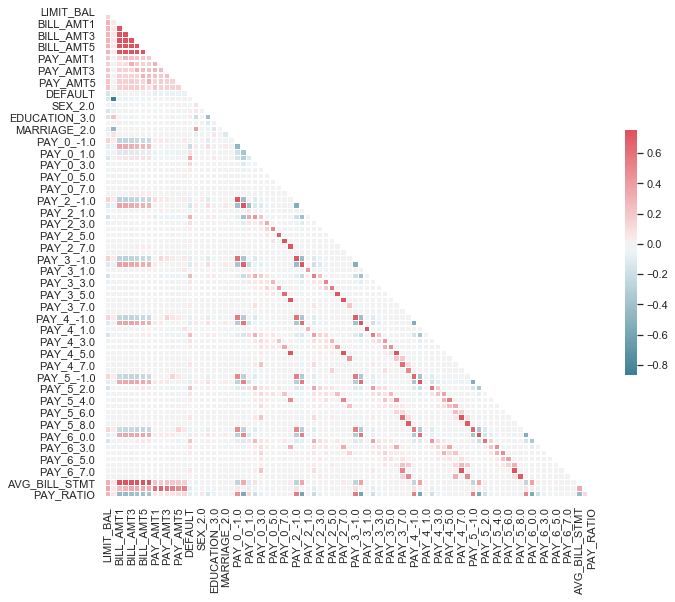

In [50]:
sns.set(style="white")
corr = working_df.corr() 

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.75, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [51]:
target = working_df['DEFAULT']
features = working_df.drop(['DEFAULT'], axis=1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=22,test_size=0.20)

In [53]:
working_df.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT', 'GENERATION', 'SEX_2.0',
       'EDUCATION_2.0', 'EDUCATION_3.0', 'EDUCATION_4.0', 'MARRIAGE_2.0',
       'MARRIAGE_3.0', 'PAY_0_-1.0', 'PAY_0_0.0', 'PAY_0_1.0', 'PAY_0_2.0',
       'PAY_0_3.0', 'PAY_0_4.0', 'PAY_0_5.0', 'PAY_0_6.0', 'PAY_0_7.0',
       'PAY_0_8.0', 'PAY_2_-1.0', 'PAY_2_0.0', 'PAY_2_1.0', 'PAY_2_2.0',
       'PAY_2_3.0', 'PAY_2_4.0', 'PAY_2_5.0', 'PAY_2_6.0', 'PAY_2_7.0',
       'PAY_2_8.0', 'PAY_3_-1.0', 'PAY_3_0.0', 'PAY_3_1.0', 'PAY_3_2.0',
       'PAY_3_3.0', 'PAY_3_4.0', 'PAY_3_5.0', 'PAY_3_6.0', 'PAY_3_7.0',
       'PAY_3_8.0', 'PAY_4_-1.0', 'PAY_4_0.0', 'PAY_4_1.0', 'PAY_4_2.0',
       'PAY_4_3.0', 'PAY_4_4.0', 'PAY_4_5.0', 'PAY_4_6.0', 'PAY_4_7.0',
       'PAY_4_8.0', 'PAY_5_-1.0', 'PAY_5_0.0', 'PAY_5_2.0', 'PAY_5_3.0',
       'PAY_5_4.0', 'PAY_5_5.0', 'PAY_5_6.0

In [79]:
ols('DEFAULT~LIMIT_BAL+PAY_0_0.0+AVG_AMT_PAID+PAY_6_0.0+PAY_3_-1.0+MARRIAGE_2.0+EDUCATION_4.0+SEX_2.0+PAY_0_5.0+PAY_2_3.0+PAY_2_6.0+PAY_6_3.0+PAY_0_4.0+PAY_6_2.0+PAY_4_2.0+PAY_5_2.0+PAY_0_1.0+PAY_3_2.0+PAY_2_2.0+PAY_0_3.0+PAY_0_2.0', data=working_df).fit().summary()

PatsyError: numbers besides '0' and '1' are only allowed with **
    DEFAULT~LIMIT_BAL+PAY_0_0.0+AVG_AMT_PAID+PAY_6_0.0+PAY_3_-1.0+MARRIAGE_2.0+EDUCATION_4.0+SEX_2.0+PAY_0_5.0+PAY_2_3.0+PAY_2_6.0+PAY_6_3.0+PAY_0_4.0+PAY_6_2.0+PAY_4_2.0+PAY_5_2.0+PAY_0_1.0+PAY_3_2.0+PAY_2_2.0+PAY_0_3.0+PAY_0_2.0
                                                              ^^^

In [55]:
X= sm.add_constant(features)
Y= target
lr_model=sm.OLS(Y,X).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                DEFAULT   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     76.12
Date:                Sun, 28 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:49:02   Log-Likelihood:                -9519.3
No. Observations:               22499   AIC:                         1.920e+04
Df Residuals:                   22418   BIC:                         1.985e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1932      0.045      4.267      0.000       0.104       0.282
LIMIT_BAL     -2.501e-07   2.47e-08    -10.111      0.000   -2.99e-07   -2.02e-07
AGE               0.0007      0.001      1.253      0.210      -0.000       0.002
BILL_AMT1      2.113e-08   1.31e-07      0.161      0.872   -2.37e-07    2.79e-07
BILL_AMT2      2.064e-07   1.77e-07      1.164      0.244   -1.41e-07    5.54e-07
BILL_AMT3       1.63e-07   1.63e-07      0.997      0.319   -1.57e-07    4.83e-07
BILL_AMT4     -2.545e-08   1.74e-07     -0.146      0.884   -3.67e-07    3.16e-07
BILL_AMT5     -2.616e-07   2.07e-07     -1.266      0.205   -6.67e-07    1.43e-07
BILL_AMT6      4.331e-08    1.6e-07      0.270      0.787   -2.71e-07    3.58e-07
PAY_AMT1      -5.975e-07   1.97e-07     -3.031      0.002   -9.84e-07   -2.11e-07
PAY_AMT2      -1.813e-07   1.57e-07     -1.158      0.247   -4.88e-07    1.26e-07
PAY_AMT3       1.418e-07   1.85e-07      0.769      0.442    -2.2e-07    5.04e-07
PAY_AMT4       1.234e-07   2.04e-07      0.605      0.546   -2.77e-07    5.23e-07
PAY_AMT5      -2.837e-07   2.11e-07     -1.346      0.178   -6.97e-07    1.29e-07
PAY_AMT6       -2.61e-07   1.52e-07     -1.714      0.087    -5.6e-07    3.75e-08
GENERATION        0.0016      0.009      0.190      0.850      -0.015       0.019
SEX_2.0          -0.0193      0.005     -3.766      0.000      -0.029      -0.009
EDUCATION_2.0     0.0048      0.006      0.817      0.414      -0.007       0.016
EDUCATION_3.0    -0.0023      0.008     -0.293      0.769      -0.018       0.013
EDUCATION_4.0    -0.0853      0.020     -4.196      0.000      -0.125      -0.045
MARRIAGE_2.0     -0.0187      0.006     -3.260      0.001      -0.030      -0.007
MARRIAGE_3.0     -0.0490      0.023     -2.164      0.030      -0.093      -0.005
PAY_0_-1.0        0.0664      0.017      3.800      0.000       0.032       0.101
PAY_0_0.0        -0.0303      0.019     -1.586      0.113      -0.068       0.007
PAY_0_1.0         0.1270      0.014      9.160      0.000       0.100       0.154
PAY_0_2.0         0.4165      0.018     23.124      0.000       0.381       0.452
PAY_0_3.0         0.4263      0.030     13.976      0.000       0.366       0.486
PAY_0_4.0         0.3550      0.059      6.017      0.000       0.239       0.471
PAY_0_5.0         0.3124      0.100      3.132      0.002       0.117       0.508
PAY_0_6.0        -0.0468      0.176     -0.265      0.791      -0.392       0.299
PAY_0_7.0         0.2135      0.307      0.697      0.486      -0.387       0.814
PAY_0_8.0        -0.3739      0.383     -0.977      0.329      -1.124       0.376
PAY_2_-1.0       -0.0147      0.019     -0.759      0.448      -0.053       0.023
PAY_2_0.0         0.0253      0.024      1.063      0.288      -0.021       0.072
PAY_2_1.0        -0.2218      0.084     -2.631   

In [56]:
scaler = StandardScaler()
# fit the scaler to the training data
scaler.fit(X_train)
#transform the training data
X_train = pd.DataFrame(data = scaler.transform(X_train), columns = features.columns)
#transform the testing dat
X_test = pd.DataFrame(data = scaler.transform(X_test), columns = features.columns)

In [76]:
## training the model
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.01, normalize = False)
lasso = lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Root Mean Squared Error:' , train_rmse)
print("Testing Rooot Mean Squared Error:" , test_rmse)
# print ("R^2 Score:", lasso.score(y_train, y_train_pred))
print ("R^2 Train Score:", metrics.r2_score(y_train, (y_train_pred)))
print("R^2 Test Score:", metrics.r2_score(y_test, y_pred))

Training Root Mean Squared Error: 0.3718456897973327
Testing Rooot Mean Squared Error: 0.37374945414858746
R^2 Train Score: 0.20527683103309124
R^2 Test Score: 0.1865532300978303


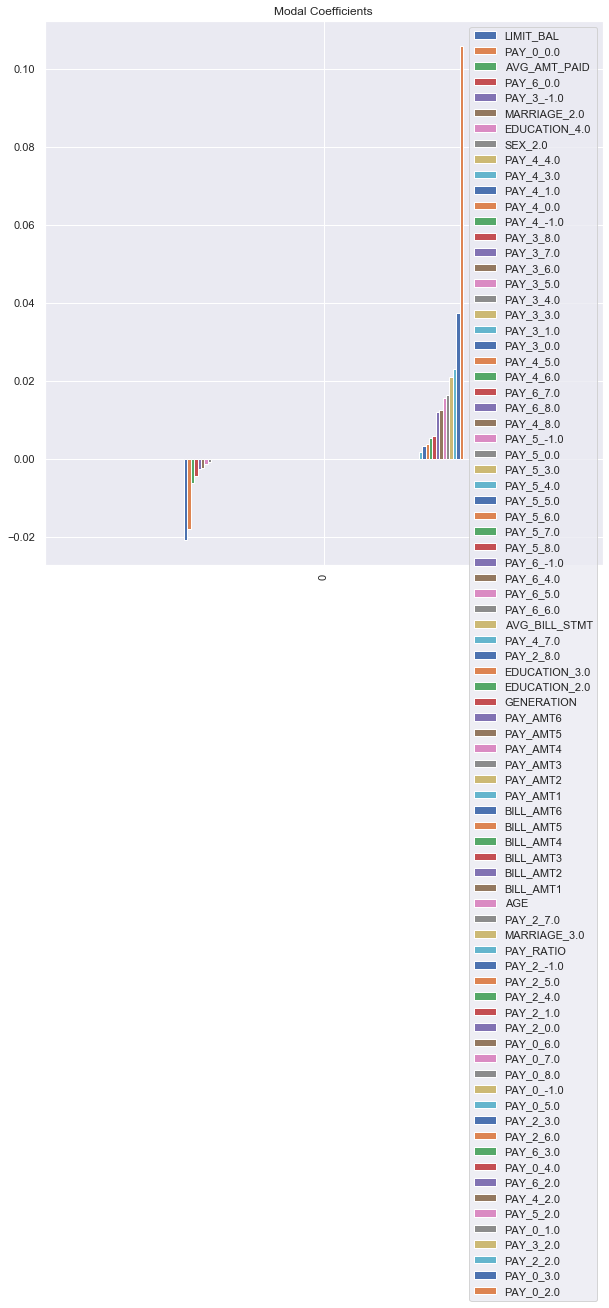

In [77]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=True, figsize=(10,10))

In [81]:
lasso_coef01

,LIMIT_BAL,PAY_0_0.0,AVG_AMT_PAID,PAY_6_0.0,PAY_3_-1.0,MARRIAGE_2.0,EDUCATION_4.0,SEX_2.0,PAY_4_4.0,PAY_4_3.0,PAY_4_1.0,PAY_4_0.0,PAY_4_-1.0,PAY_3_8.0,PAY_3_7.0,PAY_3_6.0,PAY_3_5.0,PAY_3_4.0,PAY_3_3.0,PAY_3_1.0,PAY_3_0.0,PAY_4_5.0,PAY_4_6.0,PAY_6_7.0,PAY_6_8.0,PAY_4_8.0,PAY_5_-1.0,PAY_5_0.0,PAY_5_3.0,PAY_5_4.0,PAY_5_5.0,PAY_5_6.0,PAY_5_7.0,PAY_5_8.0,PAY_6_-1.0,PAY_6_4.0,PAY_6_5.0,PAY_6_6.0,AVG_BILL_STMT,PAY_4_7.0,PAY_2_8.0,EDUCATION_3.0,EDUCATION_2.0,GENERATION,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,PAY_AMT1,BILL_AMT6,BILL_AMT5,BILL_AMT4,BILL_AMT3,BILL_AMT2,BILL_AMT1,AGE,PAY_2_7.0,MARRIAGE_3.0,PAY_RATIO,PAY_2_-1.0,PAY_2_5.0,PAY_2_4.0,PAY_2_1.0,PAY_2_0.0,PAY_0_6.0,PAY_0_7.0,PAY_0_8.0,PAY_0_-1.0,PAY_0_5.0,PAY_2_3.0,PAY_2_6.0,PAY_6_3.0,PAY_0_4.0,PAY_6_2.0,PAY_4_2.0,PAY_5_2.0,PAY_0_1.0,PAY_3_2.0,PAY_2_2.0,PAY_0_3.0,PAY_0_2.0
0,-0.020709,-0.018043,-0.006076,-0.004425,-0.00247,-0.002214,-0.001281,-0.00075,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.001787,0.003257,0.003891,0.005508,0.00604,0.012004,0.012587,0.015701,0.016532,0.020953,0.023126,0.037332,0.10596


In [89]:
new_features = working_df[['LIMIT_BAL','PAY_0_0.0','AVG_AMT_PAID','PAY_6_0.0','PAY_3_-1.0','MARRIAGE_2.0','EDUCATION_4.0','SEX_2.0','PAY_0_5.0','PAY_2_3.0','PAY_2_6.0','PAY_6_3.0','PAY_0_4.0','PAY_6_2.0','PAY_4_2.0','PAY_5_2.0','PAY_0_1.0','PAY_3_2.0','PAY_2_2.0','PAY_0_3.0','PAY_0_2.0']]

In [90]:
new_features.head()

,LIMIT_BAL,PAY_0_0.0,AVG_AMT_PAID,PAY_6_0.0,PAY_3_-1.0,MARRIAGE_2.0,EDUCATION_4.0,SEX_2.0,PAY_0_5.0,PAY_2_3.0,PAY_2_6.0,PAY_6_3.0,PAY_0_4.0,PAY_6_2.0,PAY_4_2.0,PAY_5_2.0,PAY_0_1.0,PAY_3_2.0,PAY_2_2.0,PAY_0_3.0,PAY_0_2.0
28835,220000.0,1.0,31485.166667,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,200000.0,0.0,326.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18894,180000.0,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
690,80000.0,1.0,1601.833333,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6239,10000.0,1.0,883.333333,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
X= sm.add_constant(new_features)
Y= target
lr_model=sm.OLS(Y,X).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                DEFAULT   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     282.1
Date:                Sun, 28 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:26:33   Log-Likelihood:                -9590.7
No. Observations:               22499   AIC:                         1.923e+04
Df Residuals:                   22477   BIC:                         1.940e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2505      0.009     28.067      0.000       0.233       0.268
LIMIT_BAL     -2.146e-07   2.14e-08    -10.048      0.000   -2.56e-07   -1.73e-07
PAY_0_0.0        -0.0431      0.008     -5.444      0.000      -0.059      -0.028
AVG_AMT_PAID  -1.074e-06   2.53e-07     -4.247      0.000   -1.57e-06   -5.78e-07
PAY_6_0.0        -0.0224      0.007     -3.305      0.001      -0.036      -0.009
PAY_3_-1.0       -0.0333      0.007     -4.508      0.000      -0.048      -0.019
MARRIAGE_2.0     -0.0234      0.005     -4.697      0.000      -0.033      -0.014
EDUCATION_4.0    -0.0852      0.020     -4.265      0.000      -0.124      -0.046
SEX_2.0          -0.0230      0.005     -4.530      0.000      -0.033      -0.013
PAY_0_5.0         0.2411      0.084      2.875      0.004       0.077       0.405
PAY_2_3.0         0.0809      0.027      2.971      0.003       0.028       0.134
PAY_2_6.0         0.7178      0.132      5.435      0.000       0.459       0.977
PAY_6_3.0         0.1634      0.032      5.071      0.000       0.100       0.227
PAY_0_4.0         0.3072      0.056      5.480      0.000       0.197       0.417
PAY_6_2.0         0.0411      0.012      3.365      0.001       0.017       0.065
PAY_4_2.0         0.0464      0.011      4.178      0.000       0.025       0.068
PAY_5_2.0         0.0602      0.012      4.889      0.000       0.036       0.084
PAY_0_1.0         0.0859      0.010      8.912      0.000       0.067       0.105
PAY_3_2.0         0.0581      0.010      5.628      0.000       0.038       0.078
PAY_2_2.0         0.0559      0.011      4.986      0.000       0.034       0.078
PAY_0_3.0         0.4084      0.026     15.535      0.000       0.357       0.460
PAY_0_2.0         0.3907      0.012     33.247      0.000       0.368       0.414
==============================================================================
Omnibus:                     3799.944   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6030.103
Skew:                           1.200   Prob(JB):                         0.00
Kurtosis:                       3.819   Cond. No.                     1.13e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Lasso 


### CHECK FOR CLASS IMBALANCE FIRST

and then:

Questions: 
    
put hypothesis tests here,
also visualizations maybe?

what is the relationship of the features to the target variable?
is there a linear relationship to the features? 

doing this will help us understand what kind of features we may want to engineer

also: we should run a pair plot to visualize
also also: we should check out correlations

once we can identify what is linear and what isn't - we will then transform the non-linear values to linear

In [58]:
y = clean_df['DEFAULT']

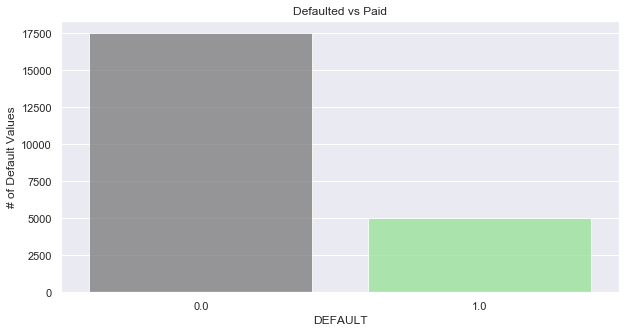

In [59]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(y, alpha =.80, palette= ['grey','lightgreen'])
plt.title('Defaulted vs Paid')
plt.ylabel('# of Default Values')
plt.show()

## whoa - there is some definite class imbalance

- so, we are going to want to Up sample or maybe the tree sample thing - one of the two, because down sampling would be bananas
- but we're going to do that in a minute - first let's look at some linear relationships:

- Up-sample the minority class
- Down-sample the majority class
- Change your performance metric
- Penalize algorithms (cost-sensitive training)

## For Sunday:

- we need to fix the class imbalance
- we need to understand linear relationships so that we can engineer real cool features
- we need to cross validate our findings before we can make our models - Feature Selection

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

## 6. Model Evaluation

## 7. Final Model